In [1]:
library(repr)
library(ggplot2)
options(jupyter.plot_mimetypes='image/png',
        repr.plot.width=12, repr.plot.height=6,
        digits=2)
setwd('/home/matthew/Documents/analysis_notebooks/tair10_polII_chip/data')

color_palette <- scale_fill_manual(values=c('#E24A33', '#348ABD', '#988ED5',
                                            '#FBC15E', '#8EBA42', '#FFB5B8'))

In [4]:
library(Starr)
library(rtracklayer)
sessionInfo()

Loading required package: GenomicRanges
Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, expand, rowMeans, rowSums

The following objects are masked from ‘package:base’:

    colMeans, colSums, expand.grid, rowMeans, rowSums

Loading required package: IRanges
Loading required package: GenomeInfoDb

Attaching package: ‘GenomeInfoDb’

The following objects are masked from ‘package:Ringo’:

    genome, genome<-



R version 3.3.2 (2016-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] stats4    grid      parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] rtracklayer_1.32.2   GenomicRanges_1.24.3 GenomeInfoDb_1.8.7  
 [4] IRanges_2.6.1        S4Vectors_0.10.3     Starr_1.28.0        
 [7] affxparser_1.44.0    affy_1.50.0          Ringo_1.36.0        
[10] lattice_0.20-35      Matrix_1.2-12        limma_3.28.21       
[13] RColorBrewer_1.1-2   Biobase_2.32.0       BiocGenerics_0.18.0 
[16] ggplot2_2.2.1        repr_0.1

In [2]:
cel_files <- paste('./cel/', list.celfiles('./cel/'), sep='')
samples <- rep(c('Pol_II', 'Cntrl'), each=3)
samples_num <- paste(samples, 1:3, sep='_')
ips = samples == 'Pol_II'
controls = samples == 'Cntrl'
chrom=c('At:TIGRv5;chloroplast', 'At:TIGRv5;chr1',
        'At:TIGRv5;chr2', 'At:TIGRv5;chr3',
        'At:TIGRv5;chr4', 'At:TIGRv5;chr5',
        'At:TIGRv5;mitochondria')

bpmap <- readBpmap('./At35b_MF_v04-2_TIGRv5.bpmap')
cel <- readCelFile(bpmap, cel_files, names=samples_num,
                   type=samples, log.it=TRUE,
                   featureData=TRUE)

Loading required package: Ringo
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVigne

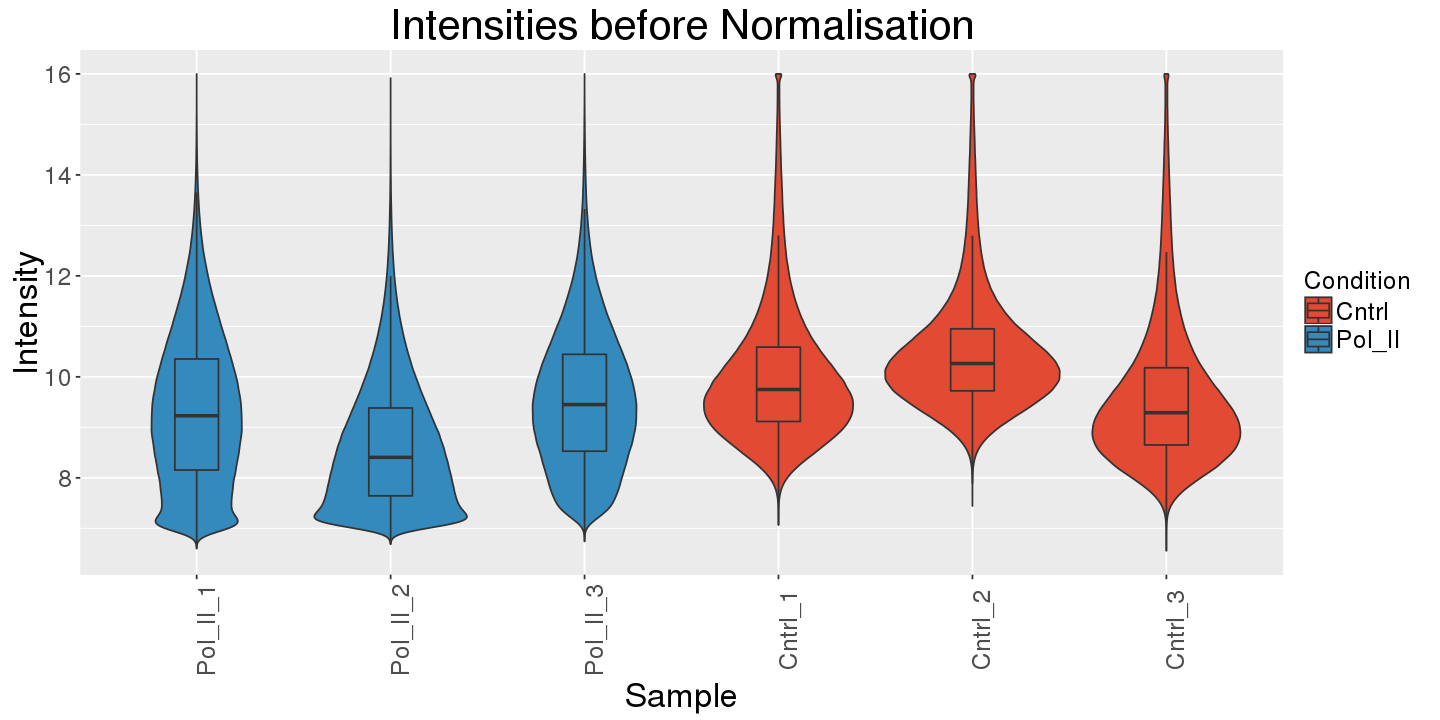

In [7]:
e <- exprs(cel)
e <- as.data.frame(exprs(cel))
e <- reshape2::melt(e, id.vars = NULL)
colnames(e) <- c('Sample', 'Intensity')
e['Condition'] <- substr(e$Sample, 0, nchar(as.character(e$Sample)) - 2)
ggplot(e, aes(x=Sample, y=Intensity)) +
  geom_violin(aes(fill=Condition),
              scale='area', trim=TRUE) +
  labs(title='Intensities before Normalisation') +
  geom_boxplot(aes(fill=Condition),
               width=0.3,
               outlier.shape=NA) +
  theme(axis.text.x=element_text(angle=90),
        axis.text=element_text(size=15),
        plot.title=element_text(size=25),
        axis.title=element_text(size=20),
        legend.text=element_text(size=15),
        legend.title=element_text(size=15)) +
  color_palette

Calculating mean intensities for A  T  C  G  


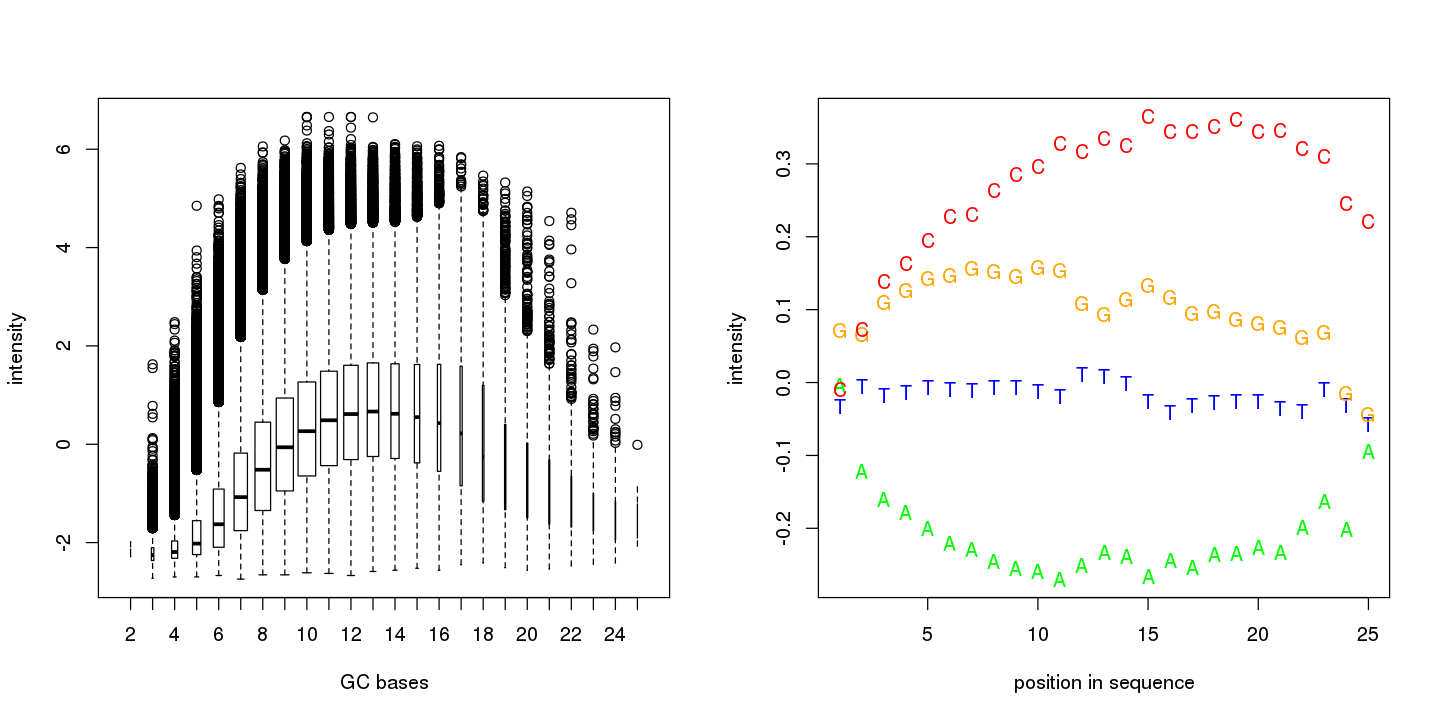

In [6]:
par(mfcol=c(1,2))
plotGCbias(exprs(cel)[,1], featureData(cel)$seq, main="")
plotPosBias(exprs(cel)[,1], featureData(cel)$seq)

In [13]:
normalised <- normalize.Probes(cel, method="loess")
ratio <- getRatio(normalised,
                  ip=ips,
                  control=controls,
                  description='Pol_II_v_Cntrl',
                  fkt='median')

Normalizing probes with method: loess
Done with 1 vs 2 in iteration 1 
Done with 1 vs 3 in iteration 1 
Done with 1 vs 4 in iteration 1 
Done with 1 vs 5 in iteration 1 
Done with 1 vs 6 in iteration 1 
Done with 2 vs 3 in iteration 1 
Done with 2 vs 4 in iteration 1 
Done with 2 vs 5 in iteration 1 
Done with 2 vs 6 in iteration 1 
Done with 3 vs 4 in iteration 1 
Done with 3 vs 5 in iteration 1 
Done with 3 vs 6 in iteration 1 
Done with 4 vs 5 in iteration 1 
Done with 4 vs 6 in iteration 1 
Done with 5 vs 6 in iteration 1 
1 0.022 
Calculating ratio
Building new ExpressionSet


Calculating mean intensities for A  T  C  G  


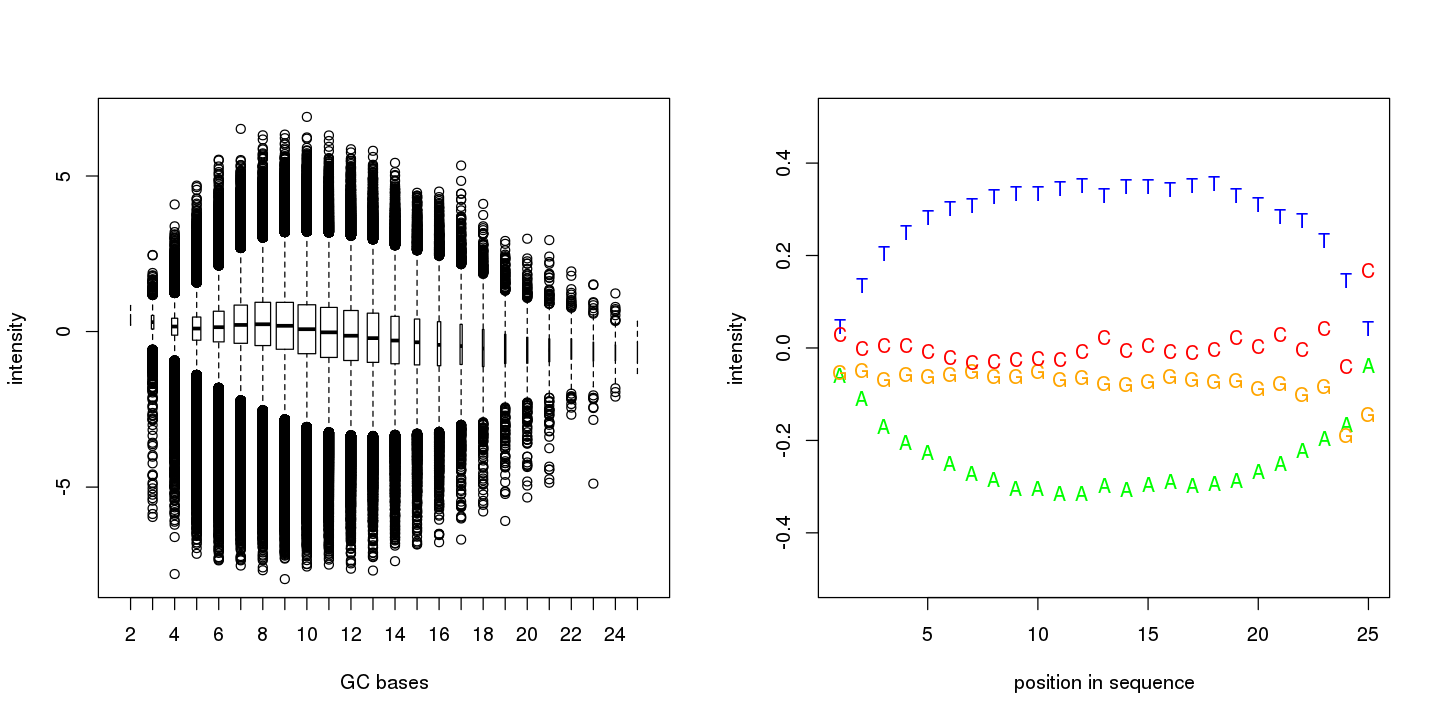

In [14]:
par(mfcol=c(1,2))
plotGCbias(exprs(ratio)[,1], featureData(normalised)$seq, main="")
plotPosBias(exprs(ratio)[,1], featureData(normalised)$seq, ylim=c(-0.5,0.5))

In [26]:
probeAnno <- bpmapToProbeAnno(bpmap)
writeWIG(ratio, probeAnno,
         file='./polII_occupancy.wig',
         chr=chrom,
         probeLength = 25)

Checking for uniqueness of probes on the chip
Creating probeAnno mapping for chromosome AffxCtrl:v1;r2_Tag AffxCtrlBkGrAntiGenomic:v1;gcBin03 AffxCtrlBkGrAntiGenomic:v1;gcBin04 AffxCtrlBkGrAntiGenomic:v1;gcBin05 AffxCtrlBkGrAntiGenomic:v1;gcBin06 AffxCtrlBkGrAntiGenomic:v1;gcBin07 AffxCtrlBkGrAntiGenomic:v1;gcBin08 AffxCtrlBkGrAntiGenomic:v1;gcBin09 AffxCtrlBkGrAntiGenomic:v1;gcBin10 AffxCtrlBkGrAntiGenomic:v1;gcBin11 AffxCtrlBkGrAntiGenomic:v1;gcBin12 AffxCtrlBkGrAntiGenomic:v1;gcBin13 AffxCtrlBkGrAntiGenomic:v1;gcBin14 AffxCtrlBkGrAntiGenomic:v1;gcBin15 AffxCtrlBkGrAntiGenomic:v1;gcBin16 AffxCtrlBkGrAntiGenomic:v1;gcBin17 AffxCtrlBkGrAntiGenomic:v1;gcBin18 AffxCtrlBkGrAntiGenomic:v1;gcBin19 AffxCtrlBkGrAntiGenomic:v1;gcBin20 AffxCtrlBkGrAntiGenomic:v1;gcBin21 AffxCtrlBkGrAntiGenomic:v1;gcBin22 AffxCtrlBkGrAntiGenomic:v1;gcBin23 AffxCtrlBkGrAntiGenomic:v1;gcBin24 AffxCtrlBkGrAntiGenomic:v1;gcBin25 AffxCtrlBkGrGenomic:v1;gcBin04 AffxCtrlBkGrGenomic:v1;gcBin05 AffxCtrlBkGrGenomic:v1;gcB

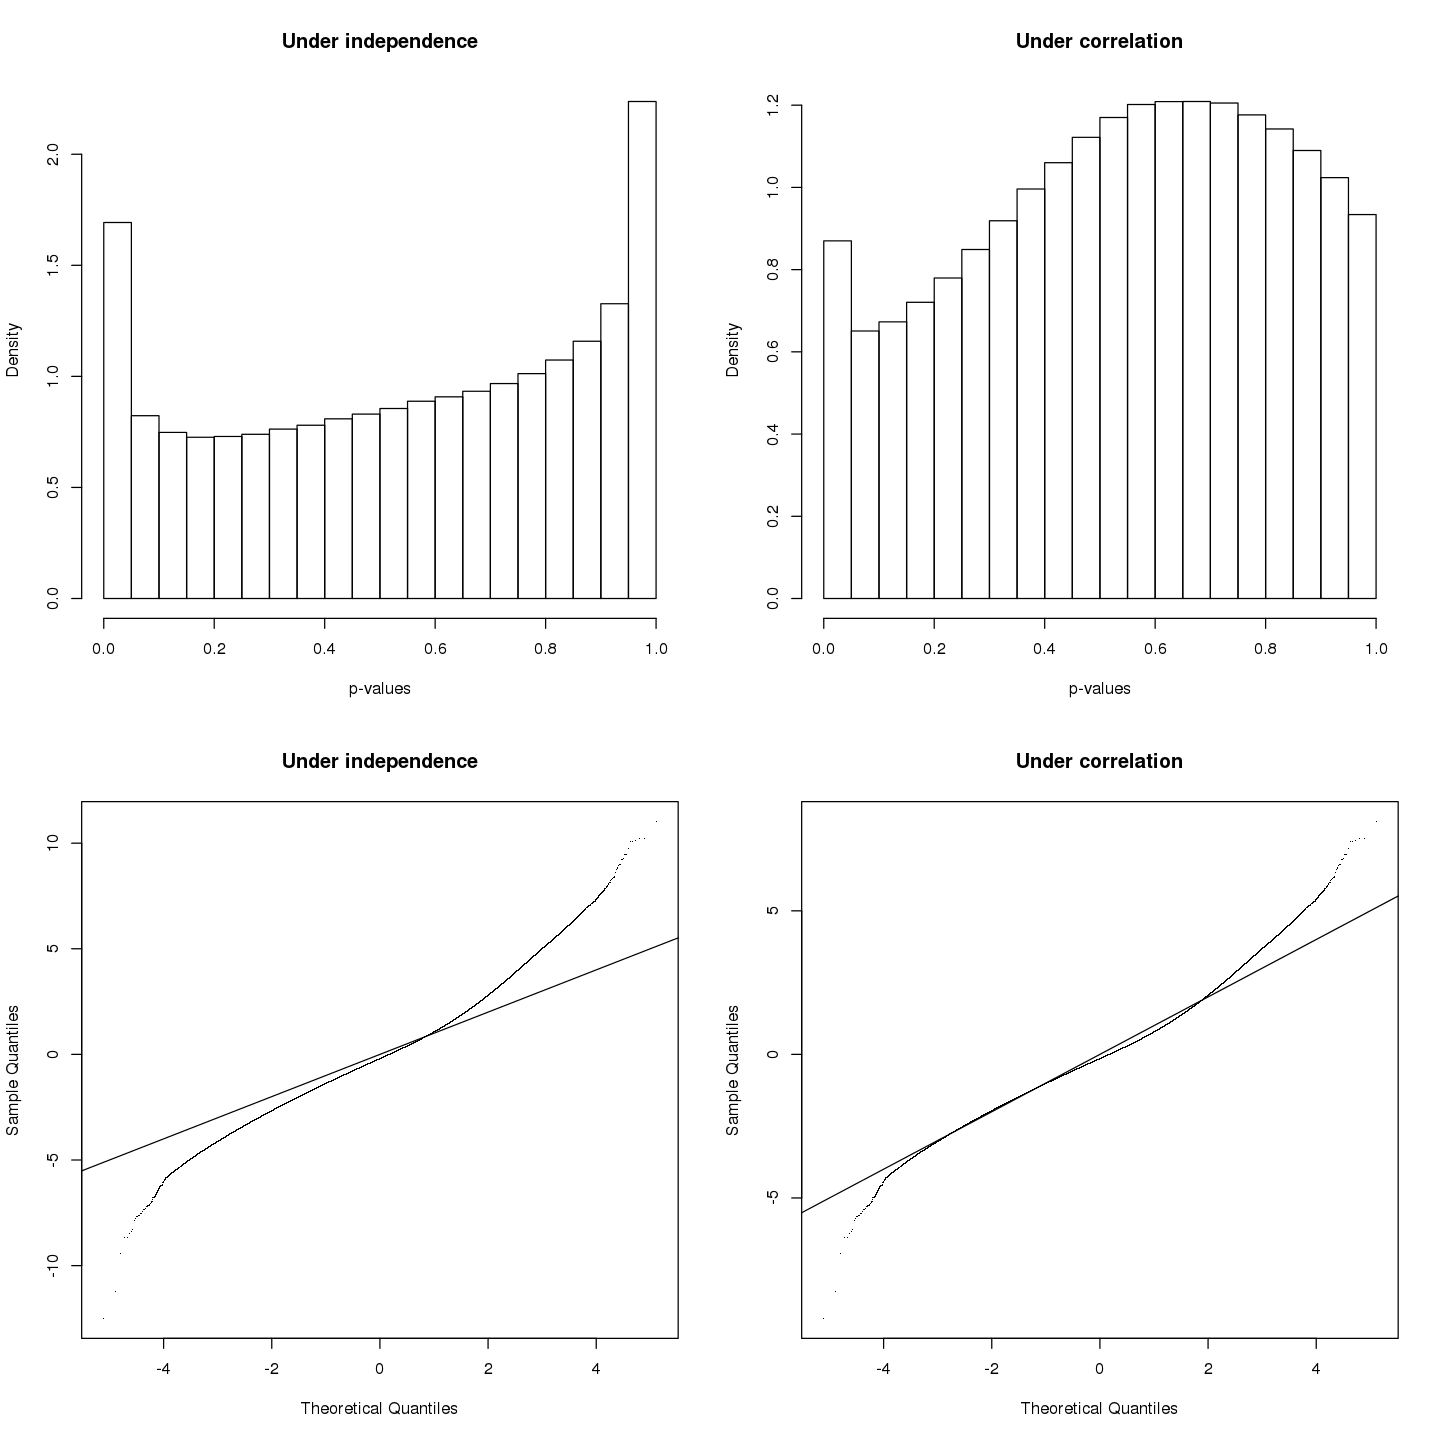

In [42]:
peaks = cmarrt.ma(ratio, probeAnno,
                  chr=chrom, M=NULL,
                  frag.length=300)
# cannot find the actual fragment length in paper so guessing a bit
options(repr.plot.width=12, repr.plot.height=12)
plotcmarrt(peaks)

In [68]:
peaklist <- cmarrt.peak(peaks, alpha = 0.1, method = "BH", minrun = 4)
str(peaklist)

List of 2
 $ cmarrt.bound:List of 6
  ..$ Chr    : chr [1:465] "At:TIGRv5;chr1" "At:TIGRv5;chr1" "At:TIGRv5;chr1" "At:TIGRv5;chr1" ...
  ..$ Start  : num [1:465] 65606 269862 399991 930785 1142190 ...
  ..$ Stop   : num [1:465] 65808 270327 400198 931039 1142429 ...
  ..$ n.probe: int [1:465] 6 13 6 6 7 8 6 6 4 4 ...
  ..$ min.pv : num [1:465] 5.64e-06 3.99e-06 7.04e-06 8.01e-06 9.39e-06 ...
  ..$ ave.pv : num [1:465] 2.47e-05 5.47e-05 3.45e-05 6.72e-05 3.49e-05 ...
 $ indep.bound :List of 6
  ..$ Chr    : chr [1:5706] "At:TIGRv5;chr1" "At:TIGRv5;chr1" "At:TIGRv5;chr1" "At:TIGRv5;chr1" ...
  ..$ Start  : num [1:5706] 33479 47390 49789 50669 57117 ...
  ..$ Stop   : num [1:5706] 33828 47680 50299 50795 57401 ...
  ..$ n.probe: int [1:5706] 10 8 14 4 8 12 6 7 4 13 ...
  ..$ min.pv : num [1:5706] 8.19e-06 3.47e-06 5.63e-07 1.56e-04 3.33e-06 ...
  ..$ ave.pv : num [1:5706] 0.000499 0.000388 0.000324 0.000648 0.000206 ...


In [69]:
peaklist <- as.data.frame(peaklist$cmarrt.bound)
peaklist <- peaklist[c(1:3, 6)]
head(peaklist)

,Chr,Start,Stop,ave.pv
1,At:TIGRv5;chr1,65606,65808,2.5e-05
2,At:TIGRv5;chr1,269862,270327,5.5e-05
3,At:TIGRv5;chr1,4e+05,4e+05,3.4e-05
4,At:TIGRv5;chr1,930785,931039,6.7e-05
5,At:TIGRv5;chr1,1142190,1142429,3.5e-05
6,At:TIGRv5;chr1,1190287,1190570,3.1e-05


In [70]:
peaklist['logP'] = format(-log10(peaklist['ave.pv']), digits=2)
peaklist = peaklist[c(1:3, 5)]
head(peaklist)

,Chr,Start,Stop,logP
1,At:TIGRv5;chr1,65606,65808,4.6
2,At:TIGRv5;chr1,269862,270327,4.3
3,At:TIGRv5;chr1,4e+05,4e+05,4.5
4,At:TIGRv5;chr1,930785,931039,4.2
5,At:TIGRv5;chr1,1142190,1142429,4.5
6,At:TIGRv5;chr1,1190287,1190570,4.5


In [71]:
write.table(peaklist,
            file='./pol_II_occupancy_peaks.txt',
            col.names=FALSE, row.names=FALSE, quote=FALSE,
            sep='\t')